In [16]:
# work in progress

# last update 2022-05-16

# Decision Trees Python Cookbook

---

In [1]:
#Importing intial list of packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

# Change how many rows of output you see
pd.set_option('display.max_rows', 1000)

### We're going to train a decision tree model on the iris dataset and then use visualize the actual decision tree.

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Import DecisionTreeClassifier from Sklearn.Tree

from sklearn.tree import DecisionTreeClassifier

In [4]:
#Assign iris features to X and species to y
X= iris.drop('species', axis =1)

In [5]:
y= iris.species

In [6]:
#Instantiate the model with max depth set to 3
dt= DecisionTreeClassifier(max_depth=3)

In [7]:
# Fit the model
dt.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [8]:
#Score the model.
dt.score(X,y)

0.9733333333333334

In [9]:
cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species=iris.species.unique()

### Visualize the decision trees using graphviz

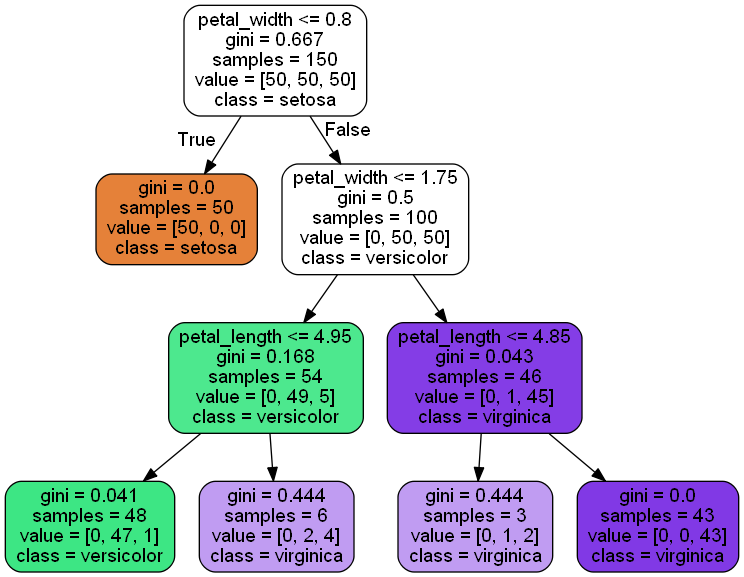

In [14]:
#Graphviz can be very useful but confusing.
#For now use this code to visualize decision trees
#Only changes you need to make are model name , list of features and list of target classes

# Imports required for graphviz
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(dt, #your model name 
                out_file=dot_data, # output file name
                feature_names=cols, # name of columns as specified in the cell above
                class_names=species, # name of the classes as specified above
                filled=True, # Visual only - Uses hue to display purity of the split
                rounded=True, # Visual only- displays rounded boxes rather than edges
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### A useful side effect of measures such as the Gini index is that they can be used give some indication of feature importance:

In [15]:
#using feature_importances_

dt.feature_importances_

array([0.        , 0.        , 0.05393633, 0.94606367])

In [16]:
# Creating a dataframe to make feature importances more usable 
pd.DataFrame({'features':X.columns,'importance':dt.feature_importances_*100})

,features,importance
0,sepal_length,0.000000
1,sepal_width,0.000000
2,petal_length,5.393633
3,petal_width,94.606367


---

---